In [15]:
# DSBDA Assignment 4-1 - Visualization on Air Quality Dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load dataset
df = pd.read_csv('AirQuality.csv', delimiter=';')

In [17]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temperature,Relative Humidity,Absolute Humidity,Year,Month,yearr,month
0,2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,75.78,2004,3,2004,3
1,2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,72.55,2004,3,2004,3
2,2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,75.02,2004,3,2004,3
3,2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,78.67,2004,3,2004,3
4,2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,78.88,2004,3,2004,3


In [18]:
# Rename columns if present (optional based on dataset)
df = df.rename(columns={'T': 'Temperature'})
df = df.rename(columns={'RH': 'Relative Humidity'})
df = df.rename(columns={'AH': 'Absolute Humidity'})

In [19]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temperature,Relative Humidity,Absolute Humidity,Year,Month,yearr,month
0,2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,75.78,2004,3,2004,3
1,2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,72.55,2004,3,2004,3
2,2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,75.02,2004,3,2004,3
3,2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,78.67,2004,3,2004,3
4,2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,78.88,2004,3,2004,3


In [20]:
# Drop unnamed columns if present
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, errors='ignore')

In [23]:
df['CO(GT)'] = df['CO(GT)'].astype(str).str.replace(',', '.').astype(float)
df['C6H6(GT)'] = df['C6H6(GT)'].astype(str).str.replace(',', '.').astype(float)
df['Temperature'] = df['Temperature'].astype(str).str.replace(',', '.').astype(float)
df['Relative Humidity'] = df['Relative Humidity'].astype(str).str.replace(',', '.').astype(float)
df['Absolute Humidity'] = df['Absolute Humidity'].astype(str).str.replace(',', '.').astype(float)


In [24]:
# Remove duplicate rows
df = df.drop_duplicates()

In [25]:
# Fill numeric NaNs with mean
df = df.fillna(df.mean(numeric_only=True))

In [26]:
# Drop remaining NaNs (from non-numeric columns)
df = df.dropna()

In [27]:
# Scale Absolute Humidity
df['Absolute Humidity'] = df['Absolute Humidity'].multiply(100)

In [28]:
# Function to remove outliers
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

In [29]:
# Remove outliers from selected columns
cols = ['Temperature', 'Relative Humidity', 'Absolute Humidity',
        'PT08.S4(NO2)', 'PT08.S5(O3)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S1(CO)']
for col in cols:
    df[col] = remove_outliers(df[col])

In [30]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['yearr'] = df['Year'].astype(str)
df['month'] = df['Month'].astype(str)

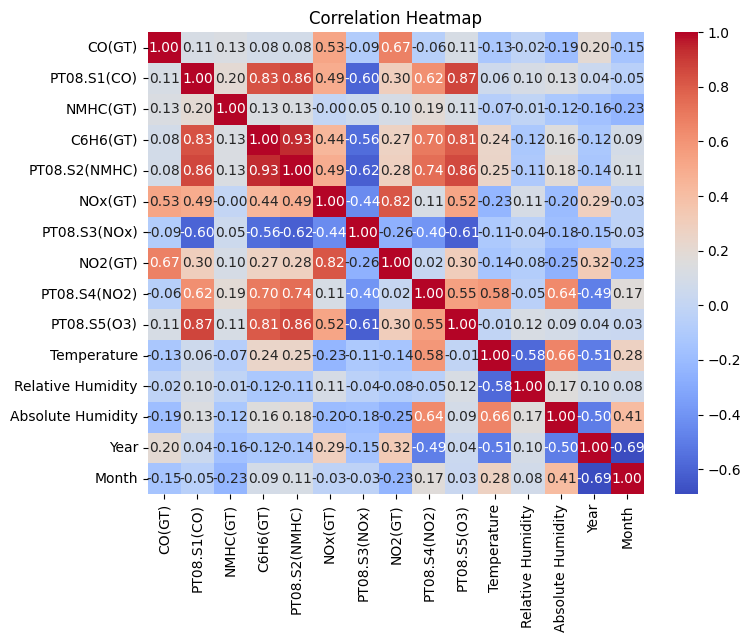

In [31]:
# 1. Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

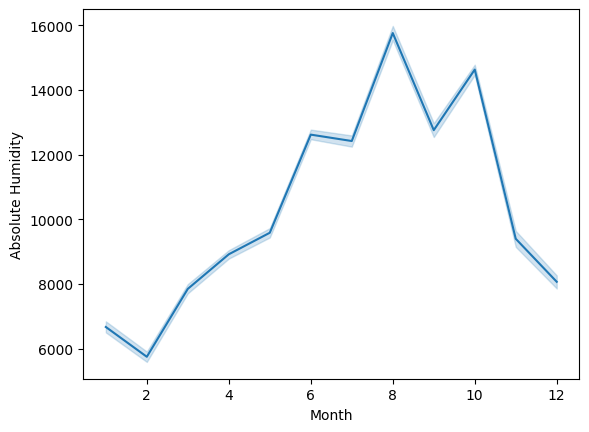

In [32]:
# 2. Line plots
sns.lineplot(df, x='Month', y='Absolute Humidity')
plt.show()

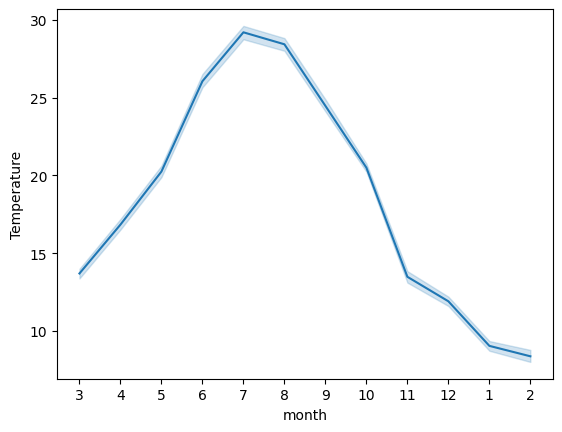

In [33]:
# 2. Line plots
sns.lineplot(df, x='month', y='Temperature')
plt.show()

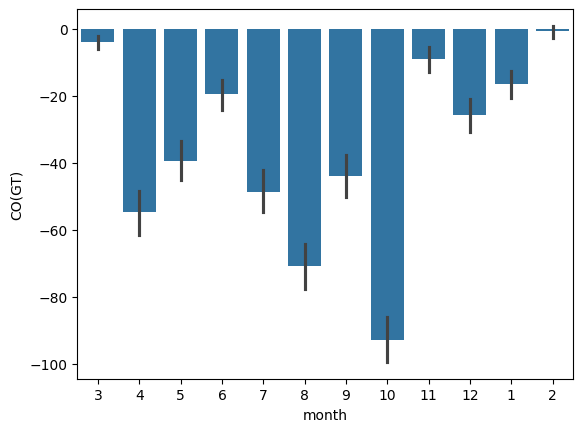

In [34]:
# 3. Bar plot
sns.barplot(df, x='month', y='CO(GT)')
plt.show()

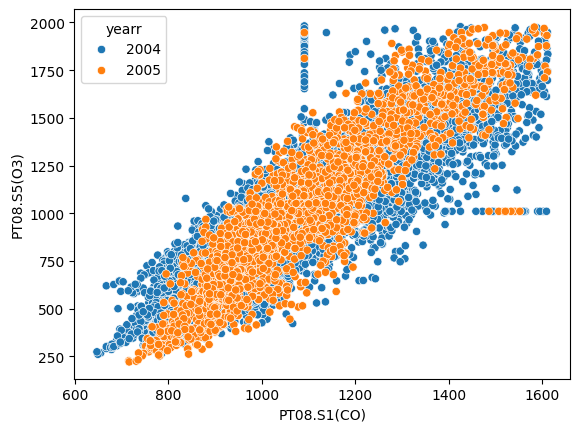

In [35]:
# 4. Scatter plot
sns.scatterplot(df, x='PT08.S1(CO)', y='PT08.S5(O3)', hue='yearr')
plt.show()

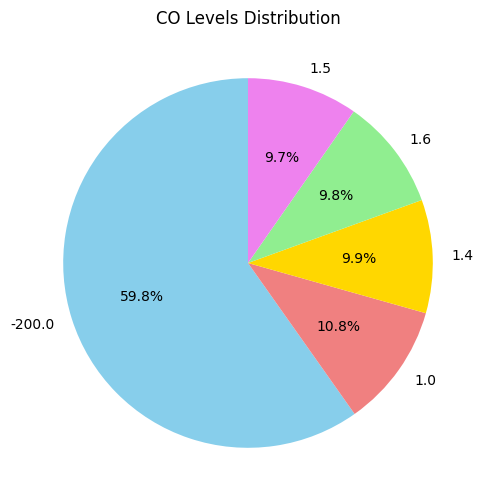

In [36]:
# 5. Pie chart
co_counts = df['CO(GT)'].value_counts().nlargest(5)
plt.figure(figsize=(6, 6))
co_counts.plot.pie(autopct='%1.1f%%', colors=["skyblue", "lightcoral", "gold", "lightgreen", "violet"], startangle=90)
plt.title("CO Levels Distribution")
plt.ylabel("")
plt.show()

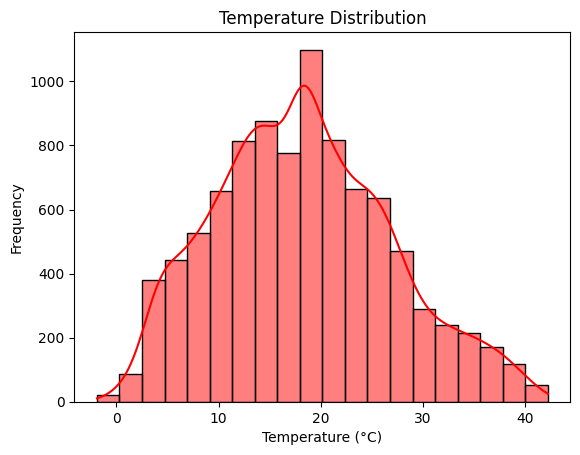

In [37]:
# 6. Histogram
sns.histplot(df['Temperature'], bins=20, kde=True, color='red')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

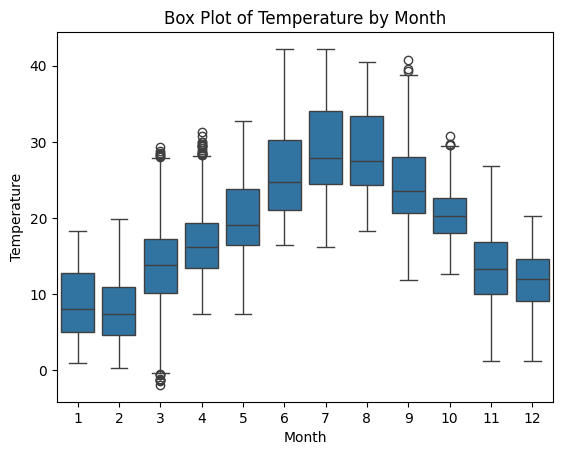

In [38]:
# 8. Box plot
sns.boxplot(data=df, x='Month', y='Temperature')
plt.title('Box Plot of Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

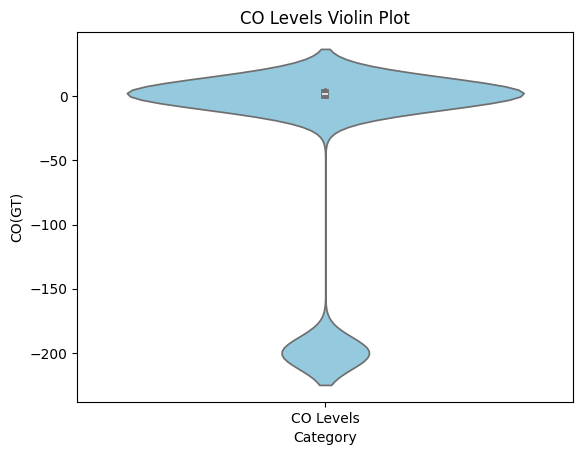

In [39]:
# 7. Violin plot
df["Category"] = "CO Levels"
sns.violinplot(x=df["Category"], y=df["CO(GT)"], color="skyblue")
plt.title("CO Levels Violin Plot")
plt.xlabel("Category")
plt.ylabel("CO(GT)")
plt.show()